<a href="https://colab.research.google.com/github/madonnasamy/customer-segmentation-app/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

#Download data
df = pd.read_csv("Mall_Customers.csv")

# Show first 5 rows
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
# General information about columns
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
# Statistical description of the data
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
# Check for empty values
df.isnull().sum()


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [32]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

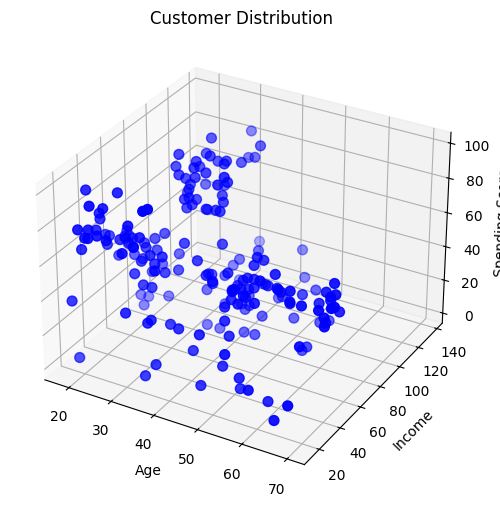

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c='blue', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Distribution')
plt.show()


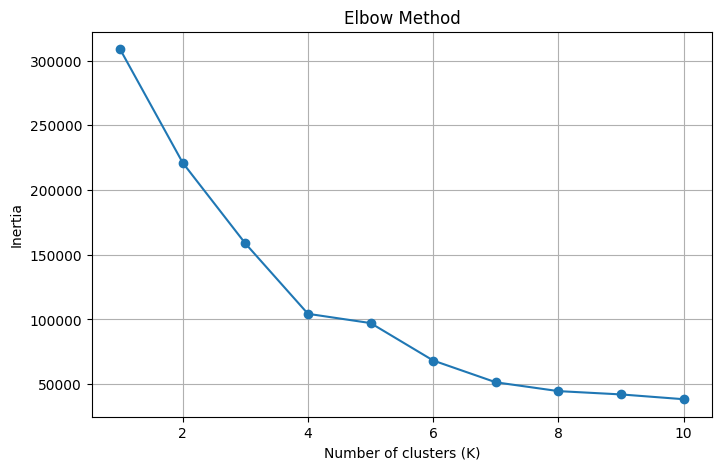

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [34]:
from sklearn.cluster import KMeans

# Create the form with 5 groups
kmeans = KMeans(n_clusters=5, random_state=42)

# Model training
kmeans.fit(data)

# Add new columns (cluster)
df['Cluster'] = kmeans.labels_

# First class show with the group
df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,2,21,15,81,2
2,3,20,16,6,0
3,4,23,16,77,2
4,5,31,17,40,0


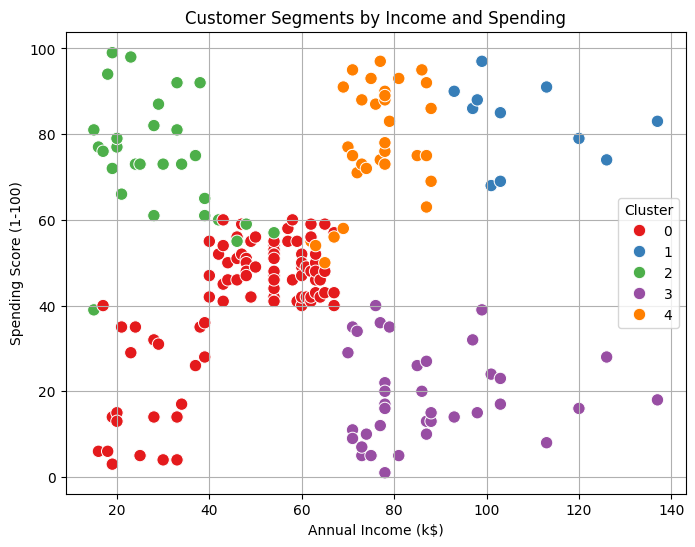

In [35]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=80)
plt.title('Customer Segments by Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


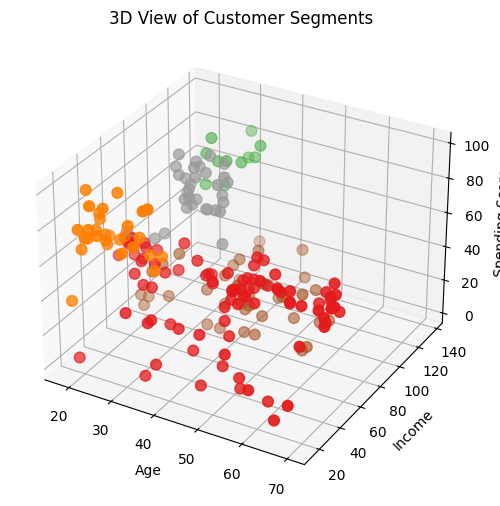

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=df['Cluster'], cmap='Set1', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')
plt.title('3D View of Customer Segments')
plt.show()


In [39]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,46.2,47.7,41.8
1,32.5,108.2,82.7
2,24.7,29.6,73.7
3,40.4,87.0,18.6
4,31.8,76.1,77.8


In [40]:
df['Cluster'].value_counts()


,count
Cluster,
0,89
3,38
4,33
2,29
1,11


In [41]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


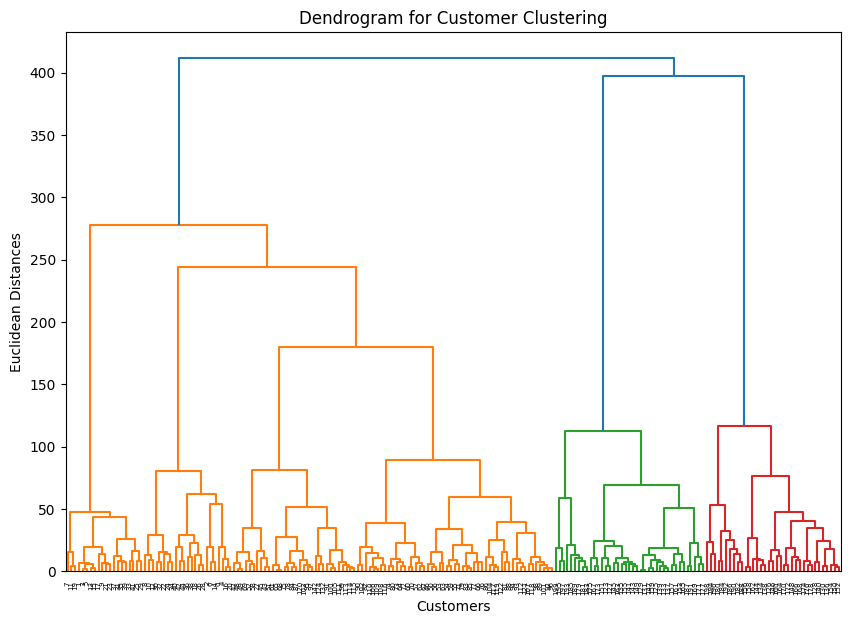

In [42]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.title("Dendrogram for Customer Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()


In [43]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Application form
df['HC_Cluster'] = hc.fit_predict(data)

# Show the first 5 rows with the new collection
df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'HC_Cluster']].head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),HC_Cluster
0,1,19,15,39,4
1,2,21,15,81,3
2,3,20,16,6,4
3,4,23,16,77,3
4,5,31,17,40,4


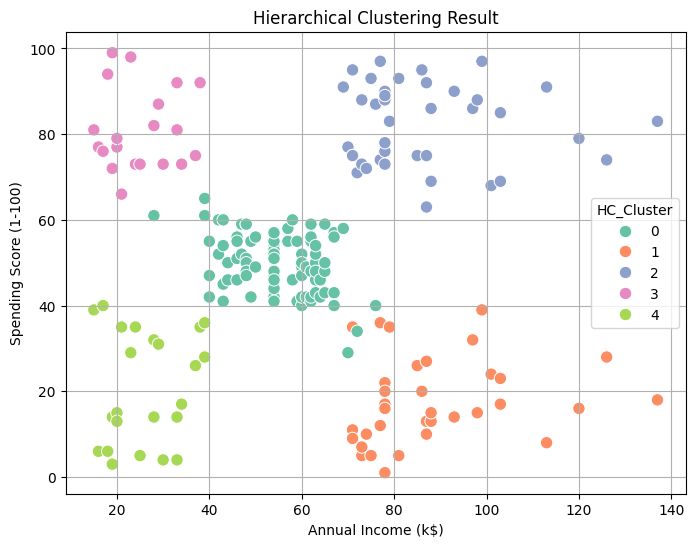

In [44]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='HC_Cluster', palette='Set2', s=80)
plt.title("Hierarchical Clustering Result")
plt.grid(True)
plt.show()

In [45]:
df.groupby('HC_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)

,Age,Annual Income (k$),Spending Score (1-100)
HC_Cluster,,,
0,42.2,54.8,49.8
1,41.7,88.2,17.3
2,32.7,86.5,82.1
3,24.8,25.0,81.0
4,45.2,26.3,20.9


In [46]:
from sklearn.mixture import GaussianMixture


In [47]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(data)

df['GMM_Cluster'] = gmm.predict(data)


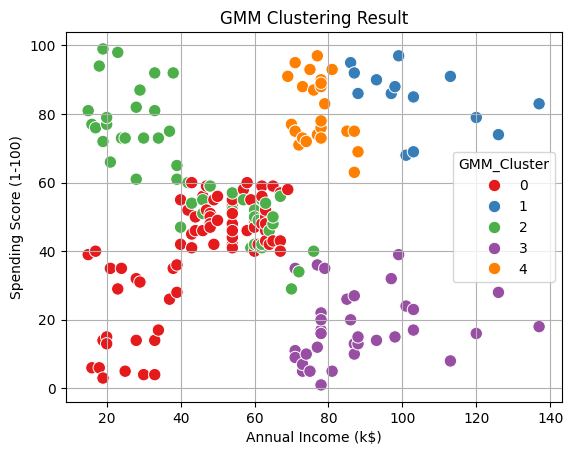

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='GMM_Cluster', palette='Set1', s=80)
plt.title("GMM Clustering Result")
plt.grid(True)
plt.show()


In [49]:
df.groupby('GMM_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)


,Age,Annual Income (k$),Spending Score (1-100)
GMM_Cluster,,,
0,50.2,45.8,40.7
1,32.6,103.6,84.5
2,24.4,43.3,62.8
3,41.7,88.2,17.3
4,32.8,77.0,80.8


In [50]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [51]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [52]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)


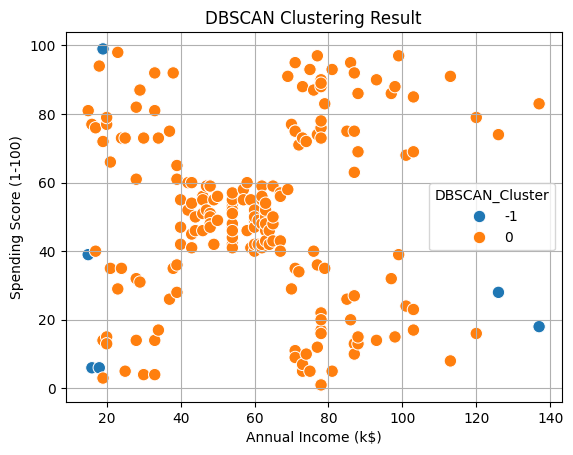

In [53]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='DBSCAN_Cluster', palette='tab10', s=80)
plt.title("DBSCAN Clustering Result")
plt.grid(True)
plt.show()


In [54]:
df['DBSCAN_Cluster'].value_counts()


,count
DBSCAN_Cluster,
0,194
-1,6


In [55]:
df.groupby('DBSCAN_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)


,Age,Annual Income (k$),Spending Score (1-100)
DBSCAN_Cluster,,,
-1,31.0,55.2,32.7
0,39.1,60.7,50.7


In [56]:
def plot_clusters(df, x_col, y_col, cluster_col, title):
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=cluster_col, palette='Set1', s=80)
    plt.title(title)
    plt.grid(True)
    plt.show()


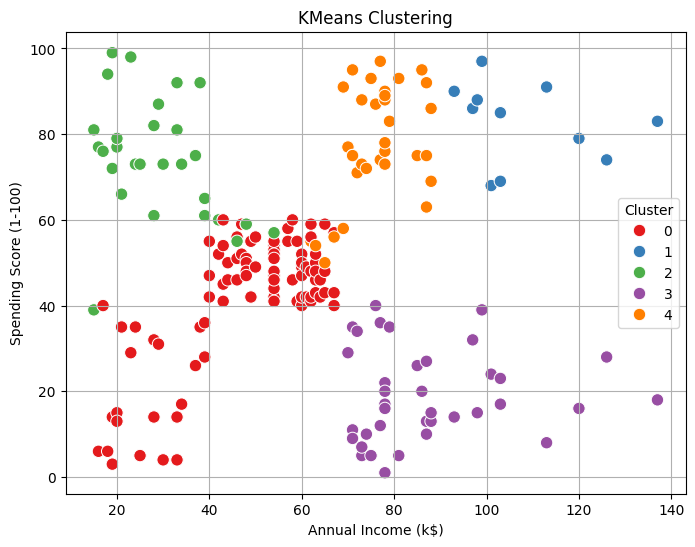

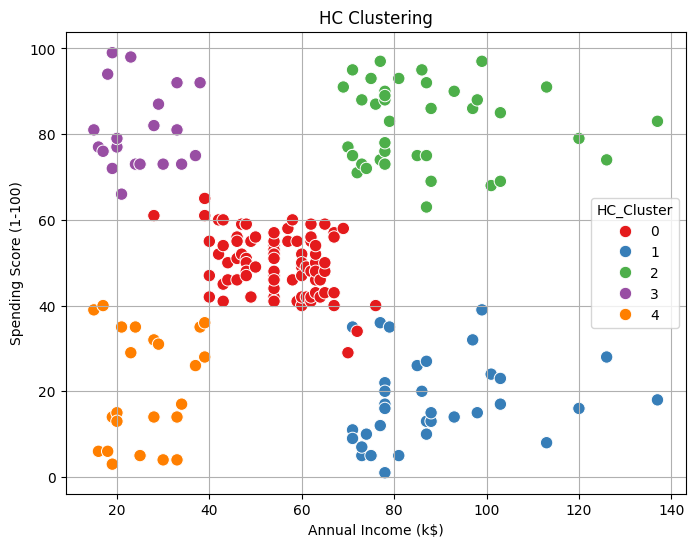

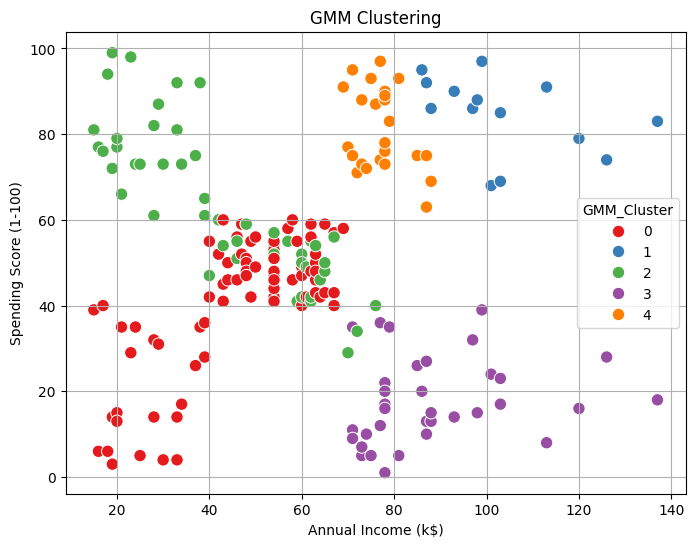

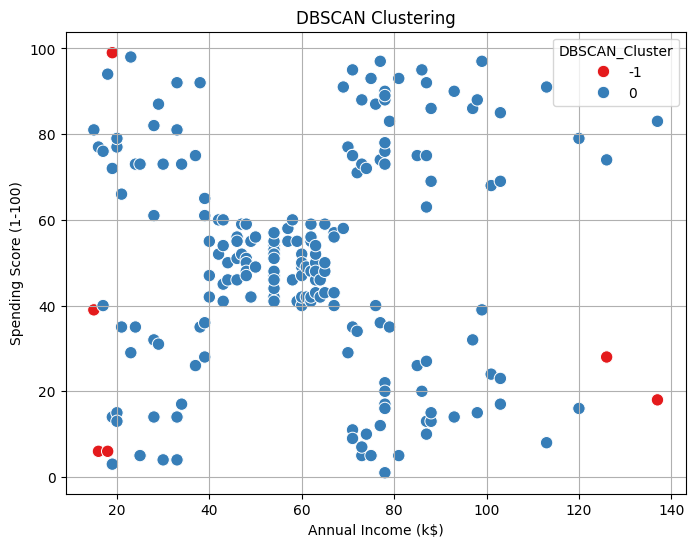

In [57]:
plot_clusters(df, 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster', 'KMeans Clustering')
plot_clusters(df, 'Annual Income (k$)', 'Spending Score (1-100)', 'HC_Cluster', 'HC Clustering')
plot_clusters(df, 'Annual Income (k$)', 'Spending Score (1-100)', 'GMM_Cluster', 'GMM Clustering')
plot_clusters(df, 'Annual Income (k$)', 'Spending Score (1-100)', 'DBSCAN_Cluster', 'DBSCAN Clustering')


In [58]:
df.to_csv("clustered_customers.csv", index=False)


In [60]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [65]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.title("Customer Segmentation using Clustering")
st.markdown("This app uses different unsupervised learning algorithms to segment customers based on their Age, Income, and Spending Score.")

df = pd.read_csv("clustered_customers.csv")
st.subheader("📊 Raw Data")
st.dataframe(df.head())

algo = st.selectbox("Select Clustering Algorithm", ['KMeans', 'HC', 'GMM', 'DBSCAN'])

cluster_col = f"{algo}_Cluster" if algo != 'KMeans' else 'Cluster'

st.subheader("📌 Cluster Summary")
if cluster_col in df.columns:
    summary = df.groupby(cluster_col)[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
    st.dataframe(summary)
else:
    st.warning(f"Clustering column '{cluster_col}' not found!")

st.subheader("📍 Cluster Plot")
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue=df[cluster_col], palette='tab10', s=80, ax=ax)
st.pyplot(fig)

st.download_button("⬇️ Download Clustered Data as CSV", data=df.to_csv(index=False), file_name="clustered_customers.csv", mime='text/csv')

Writing app.py


In [66]:
from pyngrok import ngrok
ngrok.set_auth_token("2wE7Uov3N0umUI2Bdk5OmqtgwqP_36qf5vFcyuEsfamXUm1Bv")

public_url = ngrok.connect(8501, "http")
print("👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇")
print("Your Streamlit app is live at:", public_url)

!streamlit run app.py &> /dev/null &

👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇
Your Streamlit app is live at: NgrokTunnel: "https://9e472fa31543.ngrok-free.app" -> "http://localhost:8501"


In [67]:
from google.colab import files
files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>